In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# SELECTING DATASET

In [2]:
raw_df= pd.read_csv('survey_results_public.csv')

In [3]:
raw_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [4]:
raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [5]:
schema_fname = ('survey_results_schema.csv')
schema = pd.read_csv(schema_fname, index_col='qname').question

In [6]:
schema

qname
S0             Hello world! Thank you for taking the 2022 Sta...
MetaInfo                                       Browser Meta Info
S1             Basic InformationThe first section will focus ...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

# DATA PREPRATION AND CLEANING #

In [7]:
selected_col=[#Demographics#
              'Age','Gender','EdLevel','Country',
              #Tech and programming#h
              'LearnCode','YearsCode','OpSysPersonal use','OpSysProfessional use',
              'LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','CodingActivities',
               #others#
               'Blockchain','CompTotal','SOAccount']

In [8]:
survey_df = raw_df[selected_col].copy()

In [9]:
survey_df

,Age,Gender,EdLevel,Country,LearnCode,YearsCode,OpSysPersonal use,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,CodingActivities,Blockchain,CompTotal,SOAccount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Canada,NaN,NaN,Windows Subsystem for Linux (WSL),macOS,JavaScript;TypeScript,Rust;TypeScript,NaN,Hobby;Contribute to open-source projects,Very unfavorable,NaN,Yes
2,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Books / Physical media;Friend or family member...,14,Windows,Windows,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Hobby,Very unfavorable,32000.0,Yes
3,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Israel,"Books / Physical media;School (i.e., Universit...",20,Windows,Windows,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,I don’t code outside of work,Very unfavorable,60000.0,Yes
4,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Other online resources (e.g., videos, blogs, f...",8,macOS;Windows,Windows,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Hobby,Unfavorable,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Nigeria,Books / Physical media;Other online resources ...,8,Linux-based;macOS,macOS,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Elasticsearch;MySQL;PostgreSQL;Redis,Freelance/contract work,Very favorable,60000.0,Yes
73264,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,"Other online resources (e.g., videos, blogs, f...",6,Linux-based;Windows,Linux-based;Windows,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Elasticsearch;MongoDB;Oracle;SQLite,Hobby,Unsure,107000.0,Not sure/can't remember
73265,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,Books / Physical media;Other online resources ...,42,Windows,Windows,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Hobby;School or academic work,Very unfavorable,NaN,Yes
73266,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,Books / Physical media;On the job training,50,Windows,Windows,C#;Delphi;VBA,Delphi,Microsoft SQL Server;MongoDB;Oracle,Hobby,Indifferent,58500.0,Yes


In [10]:
survey_df.shape

(73268, 15)

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     70946 non-null  object 
 1   Gender                  70853 non-null  object 
 2   EdLevel                 71571 non-null  object 
 3   Country                 71771 non-null  object 
 4   LearnCode               71580 non-null  object 
 5   YearsCode               71331 non-null  object 
 6   OpSysPersonal use       70963 non-null  object 
 7   OpSysProfessional use   65503 non-null  object 
 8   LanguageHaveWorkedWith  70975 non-null  object 
 9   LanguageWantToWorkWith  67027 non-null  object 
 10  DatabaseHaveWorkedWith  60121 non-null  object 
 11  CodingActivities        58899 non-null  object 
 12  Blockchain              71071 non-null  object 
 13  CompTotal               38422 non-null  float64
 14  SOAccount               71572 non-null

In [12]:
survey_df.LearnCode.value_counts()

School (i.e., University, College, etc)                                                                                                                                                                                      3669
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                                          3292
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                           2873
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                                  2697
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., Univers

In [13]:
learn_list = ['Books', 'online resources', 'School', 'On the job training',
             'Friend or family member','Online Courses']

In [14]:
survey_df['LearnCode'].fillna(0).value_counts()

School (i.e., University, College, etc)                                                                                                                                                                                      3669
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                                          3292
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                           2873
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                                  2697
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., Univers

In [15]:
for i in learn_list:
    survey_df['LearnCode'] = survey_df['LearnCode'].where(~(survey_df['LearnCode'].str.contains(i,na=False)),i)

In [16]:
extra_list =['Other','Coding','Colleague','Hackathons']
for j in extra_list:
    survey_df['LearnCode'] = survey_df['LearnCode'].where(~(survey_df['LearnCode'].str.contains(j,na=False)),'Other')

In [17]:
survey_df.LearnCode.value_counts()

Books                      38994
online resources           21742
School                      7311
On the job training         1109
Other                       1098
Online Courses               994
Friend or family member      332
Name: LearnCode, dtype: int64

In [18]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [19]:
survey_df.YearsCode.unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [20]:
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode, errors='coerce')

In [21]:
survey_df.describe()

,YearsCode,CompTotal
count,69746.000000,3.842200e+04
mean,12.403951,2.342434e+52
std,9.722896,4.591478e+54
min,1.000000,0.000000e+00
25%,5.000000,3.000000e+04
50%,10.000000,7.750000e+04
75%,17.000000,1.540000e+05
max,50.000000,9.000000e+56


In [22]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [23]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [24]:
survey_df.where(~(survey_df.Gender.str.contains(';|:', na=False)), np.nan, inplace=True)

In [25]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Name: Gender, dtype: int64

In [26]:
survey_df['OpSysPersonal use'].value_counts()

Windows                                                                                    21405
Linux-based                                                                                10714
macOS                                                                                      10597
Linux-based;Windows                                                                         6916
Windows;Windows Subsystem for Linux (WSL)                                                   4093
macOS;Windows                                                                               3909
Linux-based;Windows;Windows Subsystem for Linux (WSL)                                       3349
Linux-based;macOS                                                                           3018
Linux-based;macOS;Windows                                                                   1917
Linux-based;macOS;Windows;Windows Subsystem for Linux (WSL)                                 1078
macOS;Windows;Windows Subsyste

In [27]:
survey_df.loc[survey_df['OpSysPersonal use']=='Windows;Windows Subsystem for Linux (WSL)',
             'OpSysPersonal use']= 'Windows'
survey_df.loc[survey_df['OpSysPersonal use']=='Linux-based;Windows;Windows Subsystem for Linux (WSL)',
             'OpSysPersonal use']= 'Linux-based;Windows'
survey_df.where(~(survey_df['OpSysPersonal use'].str.contains('BSD|:|WSL', na=False)), np.nan, inplace=True)

In [28]:
survey_df['OpSysPersonal use'].value_counts()

Windows                      25498
Linux-based                  10714
macOS                        10597
Linux-based;Windows          10265
macOS;Windows                 3909
Linux-based;macOS             3018
Linux-based;macOS;Windows     1917
Name: OpSysPersonal use, dtype: int64

In [29]:
survey_df['OpSysProfessional use'].value_counts()

Windows                                                                                    16196
macOS                                                                                      11895
Linux-based                                                                                10461
Linux-based;Windows                                                                         5429
Linux-based;macOS                                                                           4510
Windows;Windows Subsystem for Linux (WSL)                                                   3533
Linux-based;Windows;Windows Subsystem for Linux (WSL)                                       2783
macOS;Windows                                                                               2243
Linux-based;macOS;Windows                                                                   1436
Linux-based;Windows Subsystem for Linux (WSL)                                                587
Linux-based;macOS;Windows;Wind

In [30]:
survey_df.loc[survey_df['OpSysProfessional use']=='Windows;Windows Subsystem for Linux (WSL)',
             'OpSysProfessional use']= 'Windows'
survey_df.loc[survey_df['OpSysProfessional use']=='Linux-based;Windows;Windows Subsystem for Linux (WSL)',
             'OpSysProfessional use']= 'Linux-based;Windows'

In [31]:
survey_df.where(~(survey_df['OpSysProfessional use'].str.contains('BSD|:|WSL', na=False)), np.nan, inplace=True)

In [32]:
survey_df['LanguageHaveWorkedWith'] =survey_df['LanguageHaveWorkedWith'].apply(str)

In [33]:
language_list = ['Java','JavaScript','Python','SQL','C#','PHP','HTML/CSS','R','Swift','C++','Assembly']

In [34]:
language_dict_have = {}
for i in survey_df['LanguageHaveWorkedWith']:
    for j in language_list:
        if j in i:
            language_dict_have[j]=language_dict_have.get(j,0)+1

In [35]:
language_dict_have

{'Java': 47775,
 'JavaScript': 41265,
 'Python': 29992,
 'C#': 17723,
 'HTML/CSS': 34797,
 'C++': 13930,
 'SQL': 31153,
 'Swift': 3022,
 'PHP': 12928,
 'R': 11105,
 'Assembly': 3130}

In [36]:
survey_df['LanguageWantToWorkWith'] =survey_df['LanguageWantToWorkWith'].apply(str)

In [37]:
language_dict_want = {}
for i in survey_df['LanguageWantToWorkWith']:
    for j in language_list:
        if j in i:
            language_dict_want[j]=language_dict_want.get(j,0)+1

In [38]:
language_dict_want

{'Java': 33278,
 'JavaScript': 28165,
 'C#': 14065,
 'HTML/CSS': 22633,
 'C++': 10344,
 'SQL': 22041,
 'R': 18588,
 'Python': 26020,
 'Swift': 4391,
 'PHP': 6452,
 'Assembly': 2445}

In [39]:
survey_df['DatabaseHaveWorkedWith'].value_counts()

MySQL                                                                                                      3319
PostgreSQL                                                                                                 3197
Microsoft SQL Server                                                                                       3096
SQLite                                                                                                     1837
MongoDB                                                                                                    1505
                                                                                                           ... 
CouchDB;DynamoDB;Elasticsearch;IBM DB2;MongoDB;MySQL;PostgreSQL;Firebase Realtime Database;Redis;SQLite       1
CouchDB;Elasticsearch;MariaDB;MongoDB;MySQL;PostgreSQL;Firebase Realtime Database;Redis;SQLite                1
Cassandra;Couchbase;DynamoDB;MariaDB;Microsoft SQL Server;MongoDB;MySQL;Oracle;PostgreSQL;Redis         

In [40]:
survey_df['DatabaseHaveWorkedWith'] =survey_df['DatabaseHaveWorkedWith'].apply(str)

In [41]:
db_list=['MySQL','MySQL','Microsoft SQL Server','SQLite','MongoDB','Redis','MariaDB','MariaDB','Oracle','Firebase Realtime Database']

In [42]:
db_dict = {}
for i in survey_df['DatabaseHaveWorkedWith']:
    for j in db_list:
        if j in i:
            db_dict[j]=db_dict.get(j,0)+1

In [43]:
db_dict

{'Microsoft SQL Server': 14535,
 'Firebase Realtime Database': 4597,
 'MongoDB': 14991,
 'MySQL': 50396,
 'Redis': 11423,
 'SQLite': 16826,
 'MariaDB': 18588,
 'Oracle': 6138}

In [44]:
survey_df.CodingActivities.value_counts()

Hobby                                                                                                                16424
I don’t code outside of work                                                                                          6877
Hobby;Contribute to open-source projects                                                                              5691
Hobby;Freelance/contract work                                                                                         3198
Hobby;School or academic work                                                                                         2716
                                                                                                                     ...  
Contribute to open-source projects;Bootstrapping a business;Other (please specify):;School or academic work              2
Hobby;Contribute to open-source projects;Bootstrapping a business;Other (please specify):;School or academic work        2
Contribute to op

In [45]:
survey_df['CodingActivities'] =survey_df['CodingActivities'].apply(str)

In [46]:
CA_list=['Hobby','I don’t code outside of work','Contribute to open-source projects','Freelance/contract work','School or academic work','Bootstrapping a business']

In [47]:
CA_dict = {}
for i in survey_df['CodingActivities']:
    for j in CA_list:
        if j in i:
            CA_dict[j]=CA_dict.get(j,0)+1

In [48]:
CA_dict

{'Hobby': 38027,
 'I don’t code outside of work': 6877,
 'Contribute to open-source projects': 13107,
 'Bootstrapping a business': 7251,
 'Freelance/contract work': 11669,
 'School or academic work': 7489}

In [49]:
survey_df.Blockchain.unique()

array([nan, 'Very unfavorable', 'Unfavorable', 'Favorable',
       'Very favorable', 'Indifferent', 'Unsure'], dtype=object)

In [50]:
survey_df.sample(5)

,Age,Gender,EdLevel,Country,LearnCode,YearsCode,OpSysPersonal use,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,CodingActivities,Blockchain,CompTotal,SOAccount
30133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,NaN
39790,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Germany,School,23.0,Windows,Windows,C;C#;C++;JavaScript;PowerShell;SQL;TypeScript,C#;TypeScript,Microsoft SQL Server;SQLite,Hobby,Very unfavorable,90000.0,Yes
6465,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Sweden,online resources,12.0,Linux-based;Windows,Linux-based;Windows,C#;JavaScript,C;C#,MongoDB;MySQL,Hobby,Very unfavorable,42000.0,No
19018,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Germany,Books,7.0,Linux-based,macOS,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP,MariaDB;MySQL,Hobby;Contribute to open-source projects,Favorable,5000.0,Yes
9601,18-24 years old,Man,"Secondary school (e.g. American high school, G...",Russian Federation,Books,9.0,Linux-based;macOS,NaN,Assembly;Bash/Shell;C;C++;F#;LISP;Lua;OCaml;Po...,OCaml;PowerShell,nan,nan,Very unfavorable,NaN,Yes


# EXPLORATORY ANALYSIS AND VISUALIZATION

In [51]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = 'lavender'
plt.style.use(['dark_background'])

In [52]:
survey_df.Age

0                    NaN
1                    NaN
2        25-34 years old
3        35-44 years old
4        25-34 years old
              ...       
73263    25-34 years old
73264    25-34 years old
73265    55-64 years old
73266    55-64 years old
73267    25-34 years old
Name: Age, Length: 73268, dtype: object

In [53]:
Age_count = survey_df.Age.value_counts()
Age_count

25-34 years old       25231
18-24 years old       14917
35-44 years old       12497
45-54 years old        4701
Under 18 years old     3455
55-64 years old        1775
65 years or older       487
Prefer not to say       431
Name: Age, dtype: int64

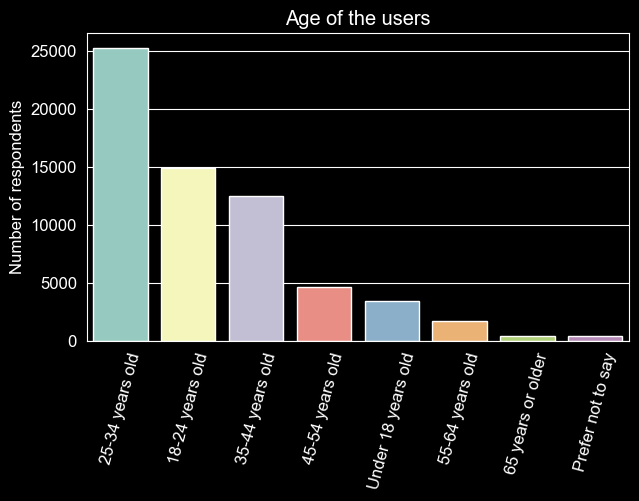

In [54]:
plt.figure(figsize=(7,4))
plt.title('Age of the users')
plt.xticks(rotation=75)
sns.barplot(x=Age_count.index,y=Age_count)
plt.ylabel('Number of respondents');

In [55]:
survey_df.Gender

0        NaN
1        NaN
2        Man
3        Man
4        NaN
        ... 
73263    Man
73264    Man
73265    Man
73266    Man
73267    Man
Name: Gender, Length: 73268, dtype: object

In [56]:
Gender_counts = survey_df.Gender.value_counts()
Gender_counts

Man                                                  58637
Woman                                                 3139
Prefer not to say                                     1020
Non-binary, genderqueer, or gender non-conforming      607
Name: Gender, dtype: int64

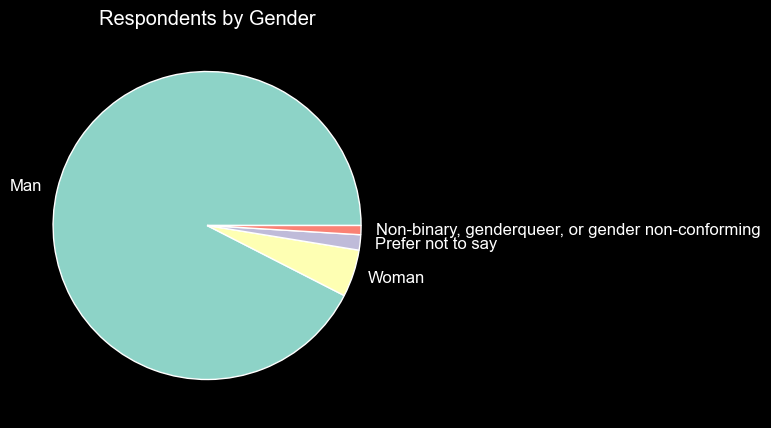

In [57]:
plt.figure(figsize=(7,5))
plt.title("Respondents by Gender")
plt.pie(Gender_counts, labels=Gender_counts.index, startangle=360);

In [58]:
EDLevel_counts = survey_df.EdLevel.value_counts()
EDLevel_counts

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          27325
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       14010
Some college/university study without earning a degree                                 8174
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7016
Associate degree (A.A., A.S., etc.)                                                    1972
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1953
Primary/elementary school                                                              1582
Something else                                                                         1058
Professional degree (JD, MD, etc.)                                                      979
Name: EdLevel, dtype: int64

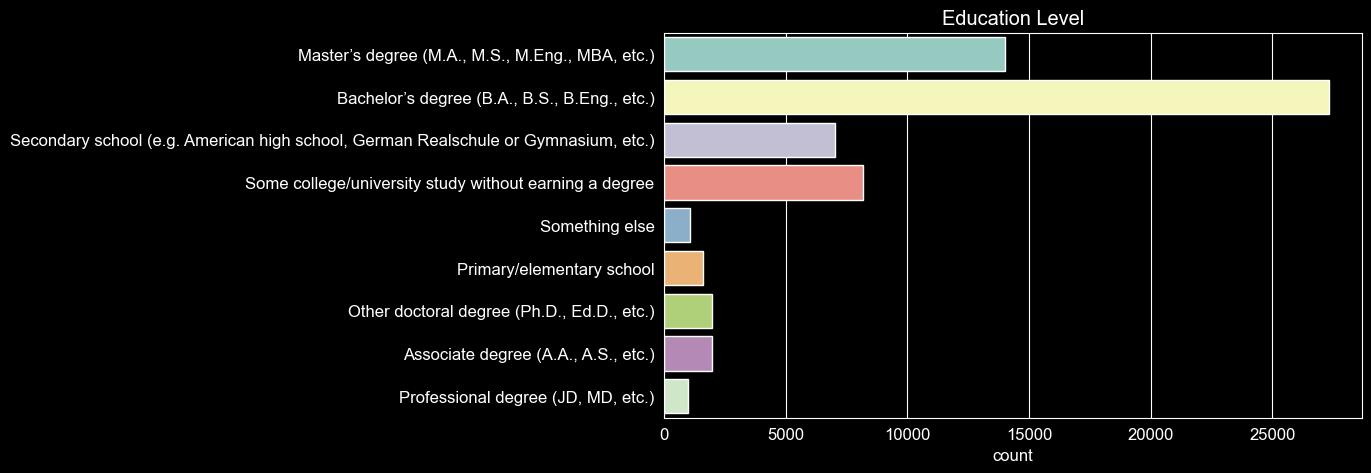

In [59]:
sns.countplot(y=survey_df.EdLevel)
plt.title("Education Level");
plt.ylabel(None);

In [60]:
edlvl_percentage = survey_df.EdLevel.value_counts(normalize =True).mul(100)
edlvl_percentage

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.649331
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.867050
Some college/university study without earning a degree                                12.758120
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.950694
Associate degree (A.A., A.S., etc.)                                                    3.077932
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.048276
Primary/elementary school                                                              2.469213
Something else                                                                         1.651345
Professional degree (JD, MD, etc.)                                                     1.528040
Name: EdLevel, dtype: float64

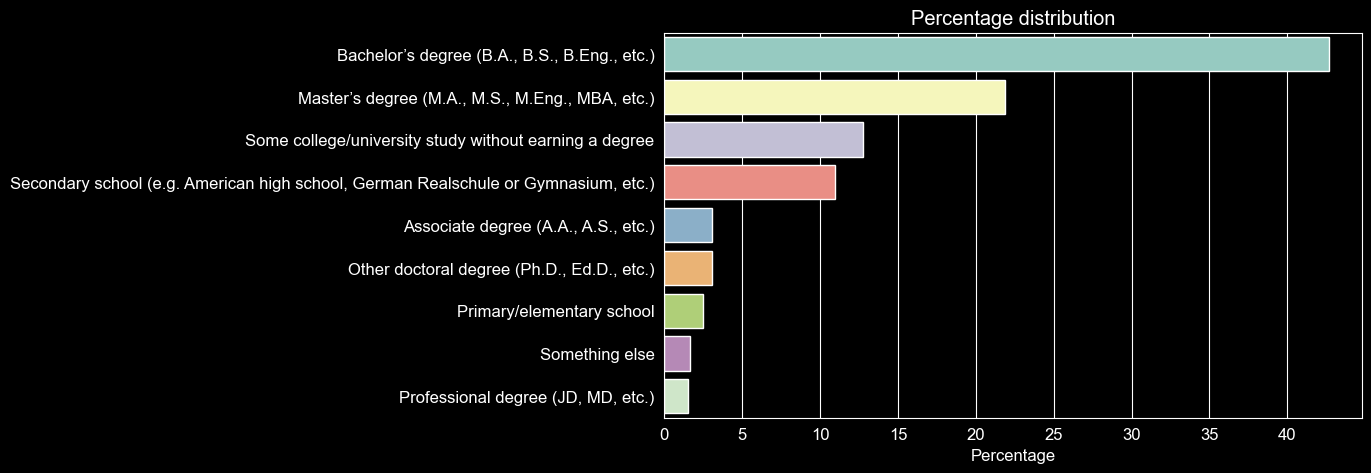

In [61]:
sns.barplot(y=edlvl_percentage.index,x=edlvl_percentage)
plt.title("Percentage distribution")
plt.xlabel('Percentage');

In [62]:
countries_counts = survey_df.Country.value_counts().head(10)
countries_counts

United States of America                                11825
India                                                    6128
Germany                                                  4907
United Kingdom of Great Britain and Northern Ireland     3761
Canada                                                   2184
France                                                   2082
Brazil                                                   1850
Poland                                                   1571
Netherlands                                              1410
Spain                                                    1388
Name: Country, dtype: int64

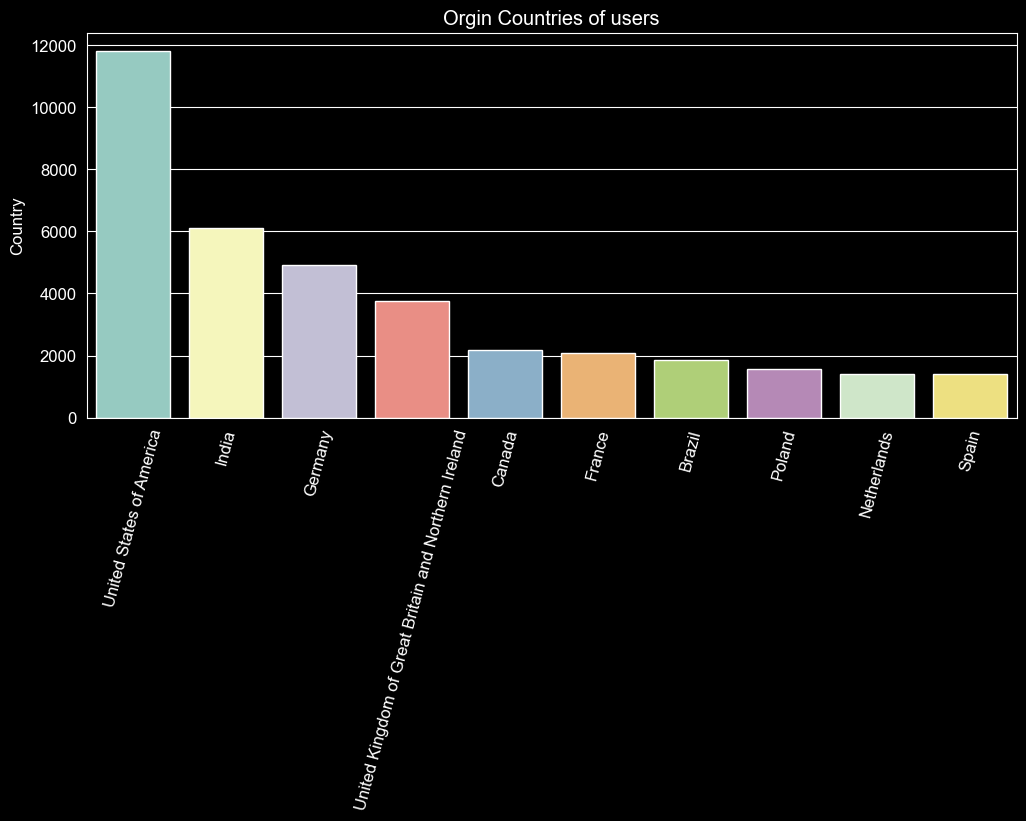

In [63]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=75)
plt.title('Orgin Countries of users')
sns.barplot(x=countries_counts.index,y=countries_counts);

In [64]:
learncode = survey_df.LearnCode.value_counts()
learncode

Books                      34541
online resources           19683
School                      6723
On the job training         1028
Other                        917
Online Courses               906
Friend or family member      289
Name: LearnCode, dtype: int64

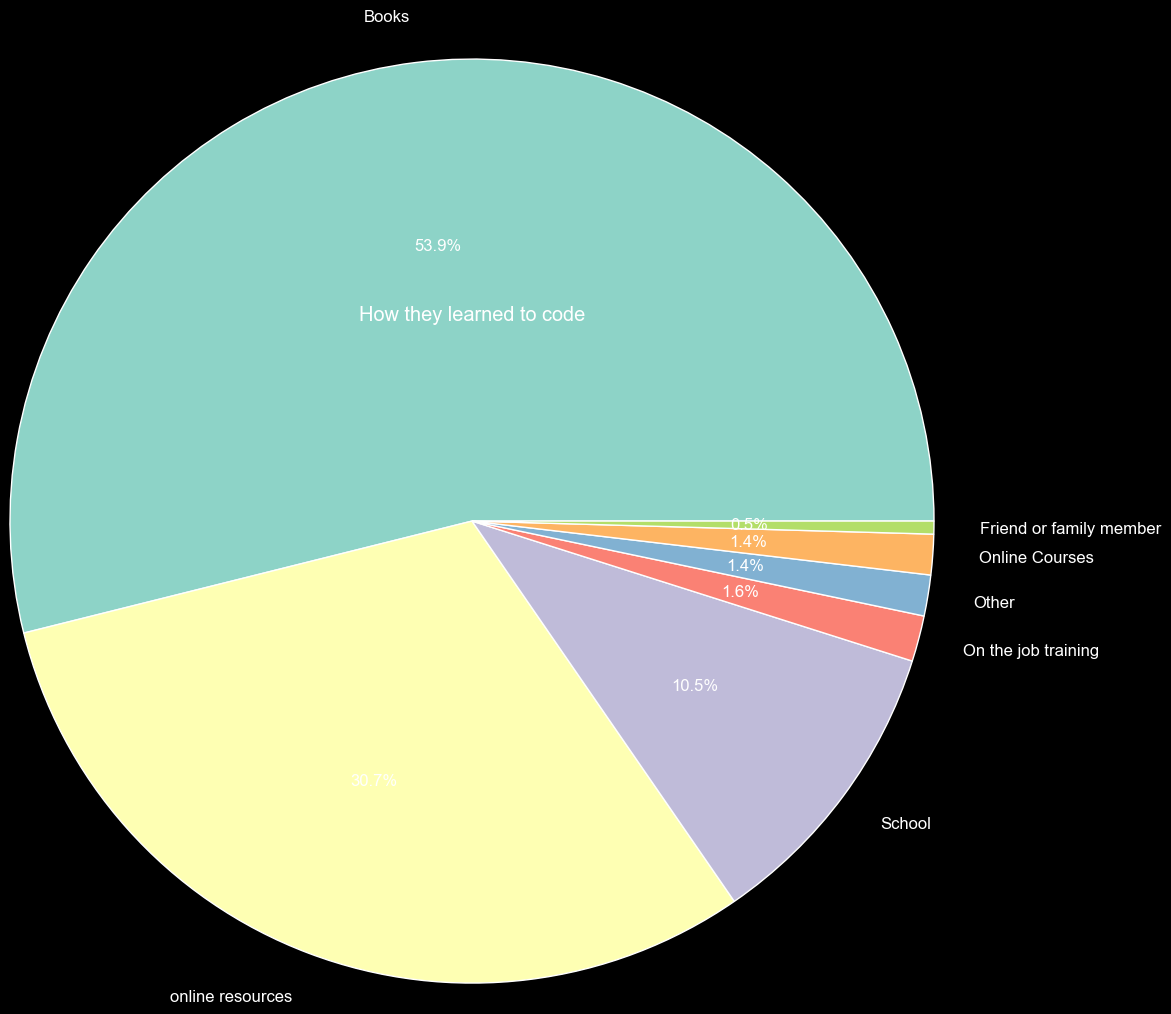

<Figure size 1800x1800 with 0 Axes>

In [65]:
plt.title("How they learned to code")
plt.pie(learncode,labels = learncode.index,autopct='%1.1f%%', radius=3);
plt.figure(figsize=(18,18));

In [66]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

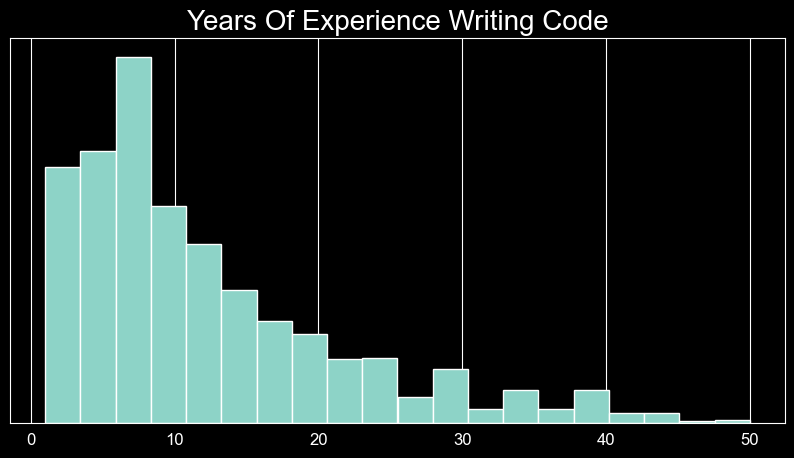

In [67]:
plt.figure(figsize=(10,5))
plt.hist(survey_df.YearsCode, bins=20)
plt.yticks([])
plt.title('Years Of Experience Writing Code', fontsize=20)
plt.show()

In [68]:
schema.OpSys

'What is the primary operating system in which you work? *'

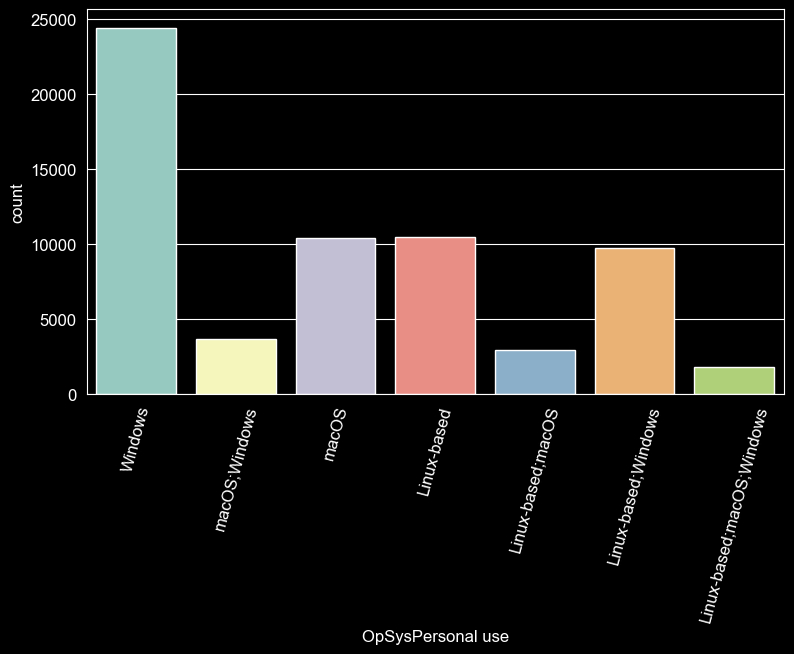

In [69]:
sns.countplot(x=survey_df['OpSysPersonal use'])
plt.xticks(rotation=75);


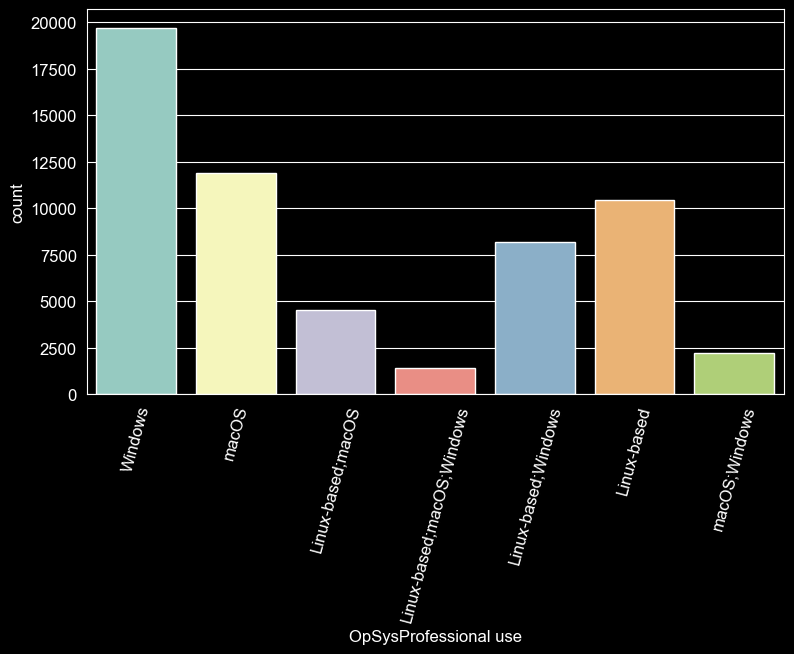

In [70]:
sns.countplot(x=survey_df['OpSysProfessional use'])
plt.xticks(rotation=75);

In [71]:
value_have = []
key_have = []
value_sum = 0
for k,v in language_dict_have.items():
    value_have.append(v)
    key_have.append(k)
    value_sum = value_sum + v

In [72]:
list(language_dict_have.values())

[47775, 41265, 29992, 17723, 34797, 13930, 31153, 3022, 12928, 11105, 3130]

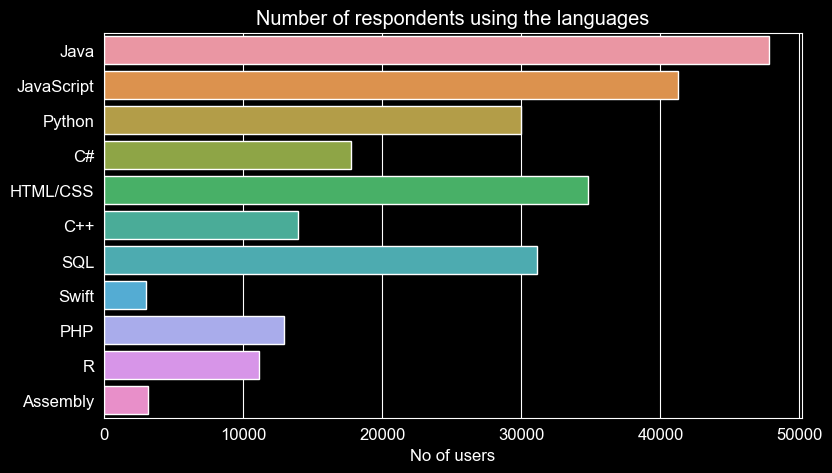

<Figure size 1200x800 with 0 Axes>

In [73]:
sns.barplot(x=list(language_dict_have.values()),y=list(language_dict_have.keys()))
plt.title("Number of respondents using the languages")
plt.xlabel("No of users");
plt.figure(figsize=(12,8));

In [74]:
value_want = []
key_want = []
value_sum2 = 0
for k,v in language_dict_want.items():
    value_want.append(v)
    key_want.append(k)
    value_sum2 = value_sum + v

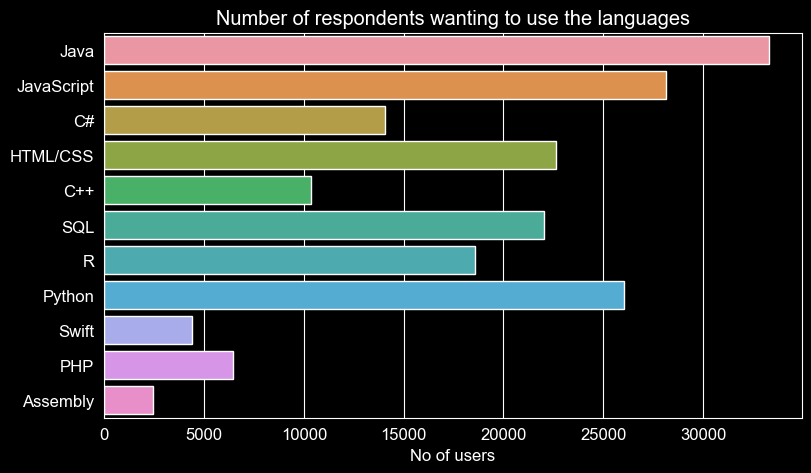

In [75]:
sns.barplot(x=value_want,y=key_want)
plt.title("Number of respondents wanting to use the languages")
plt.xlabel("No of users");

In [76]:
value = []
key = []
ValueSum = 0
for k,v in db_dict.items():
    value.append(v)
    key.append(k)
    ValueSum = ValueSum + v

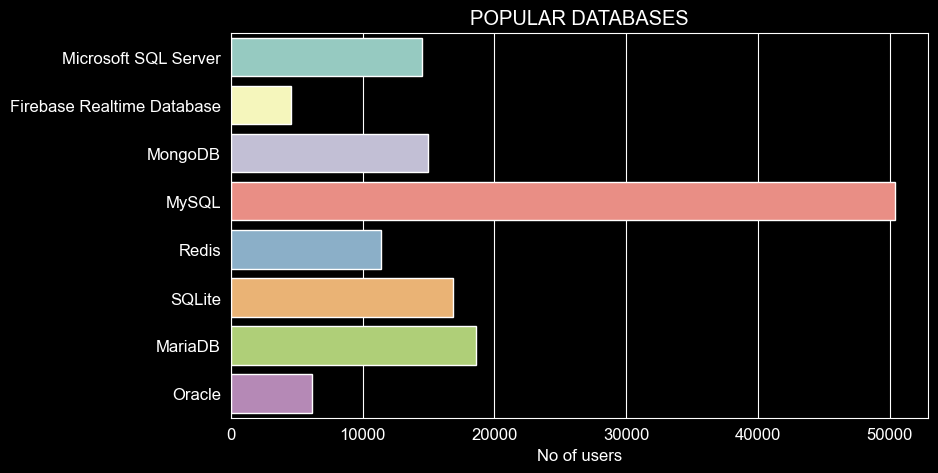

In [77]:
sns.barplot(x=value,y=key)
plt.title("POPULAR DATABASES")
plt.xlabel("No of users");

In [78]:
value_CA = []
key_CA = []
ValueSum = 0
for k,v in CA_dict.items():
    value_CA.append(v)
    key_CA.append(k)
    ValueSum = ValueSum + v

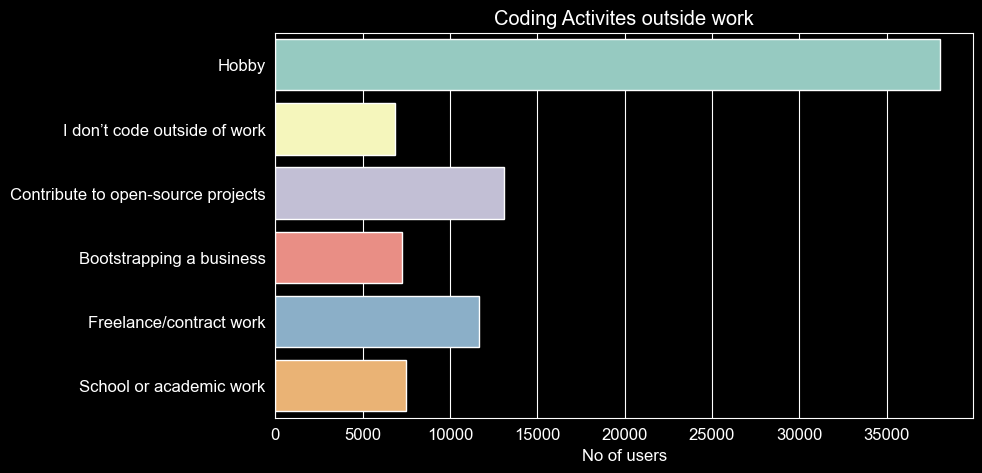

In [79]:
sns.barplot(x=value_CA,y=key_CA)
plt.title("Coding Activites outside work")
plt.xlabel("No of users");

In [80]:
so_counts = survey_df.SOAccount.value_counts().head(10)
so_counts

Yes                        52390
No                          8036
Not sure/can't remember     3644
Name: SOAccount, dtype: int64

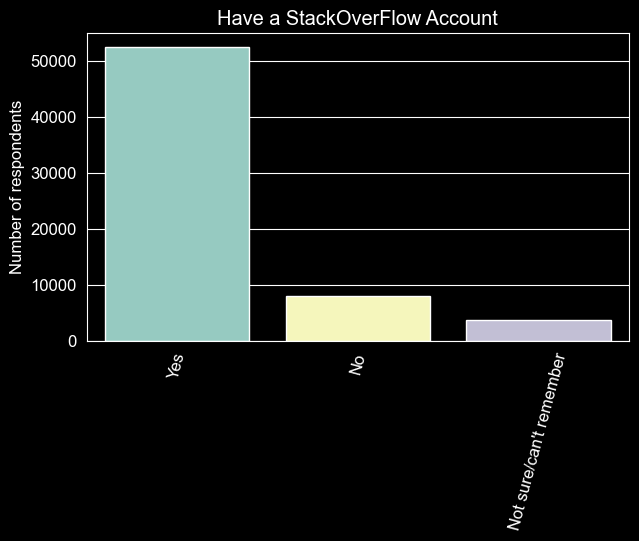

In [81]:
plt.figure(figsize=(7,4))
plt.title('Have a StackOverFlow Account')
plt.xticks(rotation=75)
sns.barplot(x=so_counts.index,y=so_counts)
plt.ylabel('Number of respondents');

In [82]:
age_18to24_df = survey_df[survey_df['Age'] == '18-24 years old']
age_25to34_df = survey_df[survey_df['Age'] == '25-34 years old'] 
age_34to44_df = survey_df[survey_df['Age'] == '35-44 years old']

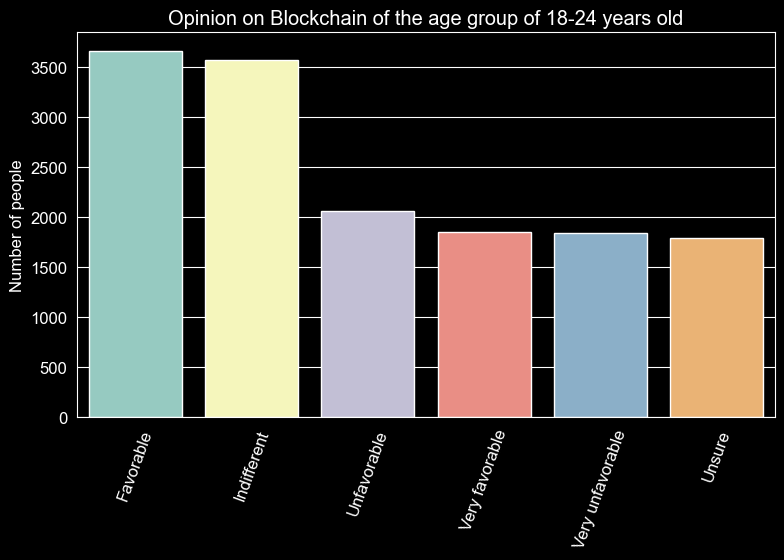

In [83]:
sns.barplot(x=age_18to24_df.Blockchain.value_counts().index, y=age_18to24_df.Blockchain.value_counts());
plt.xticks(rotation=70);
plt.title("Opinion on Blockchain of the age group of 18-24 years old")
plt.ylabel("Number of people");

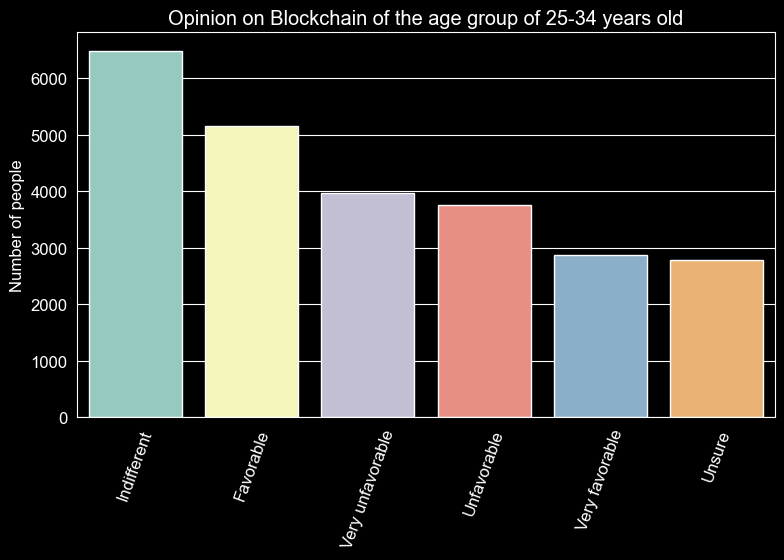

In [84]:
sns.barplot(x=age_25to34_df.Blockchain.value_counts().index, y=age_25to34_df.Blockchain.value_counts());
plt.xticks(rotation=70);
plt.title("Opinion on Blockchain of the age group of 25-34 years old")
plt.ylabel("Number of people");

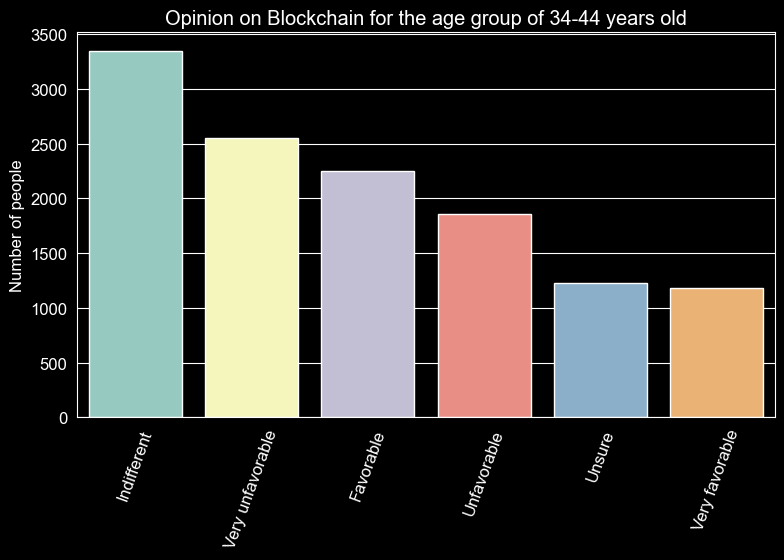

In [85]:
sns.barplot(x=age_34to44_df.Blockchain.value_counts().index, y=age_34to44_df.Blockchain.value_counts());
plt.xticks(rotation=70);
plt.title("Opinion on Blockchain for the age group of 34-44 years old")
plt.ylabel("Number of people");